In [8]:
#import libraries

import numpy as np
import math
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from num2words import num2words
from collections import defaultdict, Counter

  Using cached num2words-0.5.10-py3-none-any.whl (101 kB)
  Using cached docopt-0.6.2.tar.gz (25 kB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13709 sha256=d9beb4bcc55f09dc838413392831b499ec8d298876c11bcfdb59e020d7561b1b
  Stored in directory: c:\users\salik\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [11]:
#COMMENT OUT THE FOLLOWING LINES OF CODE TO INPUT YOUR COSTUM DOCUMENTS
#n = int(input("Enter number of documents :")) #Enter number of documents
#corpus = []
#for i in range(n):
#    corpus.append(input("Enter document",i,"string:"))
corpus = [
    'this is the FIRST!! document',
    'this document is.,,,.! the second document',
    'and this is the third one',
    'is this the last document']
doc_count = len(corpus)

# PRE-PROCESSING

In [12]:
def convert_lower_case(data):
    return np.char.lower(data)

def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

def preprocessing(doc):
    doc = convert_lower_case(doc)
    doc = remove_punctuation(doc)
    doc = remove_apostrophe(doc)
    doc = remove_stop_words(doc)
    doc = convert_numbers(doc)
    doc = stemming(doc)
    doc = remove_punctuation(doc)
    doc = convert_numbers(doc)
    doc = stemming(doc)
    doc = remove_punctuation(doc)
    doc = remove_stop_words(doc)
    return doc

# FILE EXECUTION

Before moving on to anything, we first index each word in our file to give each word in the corpus a weight for the computer to calculate the importance and relation of the word with the document at hand.

There are two types of indexing
1. Forward indexing
2. Inverted indexing

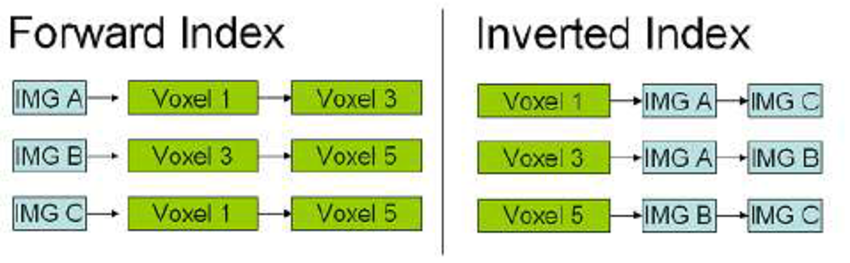

#### CALCULATING FORWARD INDEX
The forward index is essentially a list of pairs consisting of a document and a word, collated by the document.
###### structure -
```python
forward_index = {doc1:{word1:word1_count_in_doc1,
                       word2:word2_count_in_doc1,
                       word3:word3_count_in_doc1}
                ,doc2:{word4:word4_count_in_doc2,
                       word2:word2_count_in_doc2}
                }
#datatype structure
forward_index = {int:{string:int,
                      string:int}
                ,int:{string:int,
                      string:int,
                      string:int,
                      string:int}
                }
```

In [17]:
docid = 0
forward_index = defaultdict(dict)
for doc in corpus:

    #PREPROCESS DATA
    doc = preprocessing(doc)
    print("Document number -",docid,"successfully cleaned")

    doc = doc.split()
    docid+=1

    #FORWARD INDEX
    forward_index[docid]=dict(Counter(doc))

print("\n#FORWARD INDEX")
print(forward_index)
for i,j in dict(forward_index).items():
    print(i,j)

Document number - 0 successfully cleaned
Document number - 1 successfully cleaned
Document number - 2 successfully cleaned
Document number - 3 successfully cleaned

#FORWARD INDEX
defaultdict(<class 'dict'>, {1: {'first': 1, 'document': 1}, 2: {'document': 2, 'second': 1}, 3: {'third': 1, 'one': 1}, 4: {'last': 1, 'document': 1}})
1 {'first': 1, 'document': 1}
2 {'document': 2, 'second': 1}
3 {'third': 1, 'one': 1}
4 {'last': 1, 'document': 1}


#### CALCULATING INVERTED INDEX
An inverted index is an index data structure storing a mapping from content, such as words or numbers, to its locations in a document or a set of documents
###### structure -
```python
forward_index = {word1:{doc1:word1_count_in_doc1,
                        doc2:word1_count_in_doc2,
                        doc3:word1_count_in_doc3,
                        doc4:word1_count_in_doc4,
                        doc5:word1_count_in_doc5}
                ,word2:{doc4:word2_count_in_doc4,
                        doc6:word2_count_in_doc6,}
                }
#datatype structure
forward_index = {string:{int:int,
                         int:int}
                ,string:{int:int,
                         int:int,
                         int:int,
                         int:int}
                }
```

In [20]:
def get_inverted_index(Findex):
    Iindex = defaultdict(dict)
    subdict = dict()
    for doc_num,index in Findex.items():
        for token in index.keys():
            subdict[doc_num]=index.get(token)
            Iindex[token].update(subdict)
            subdict.clear()
    return Iindex

inverted_index = get_inverted_index(forward_index)
print(inverted_index)
for i,j in dict(inverted_index).items():
    print(i,j)

defaultdict(<class 'dict'>, {'first': {1: 1}, 'document': {1: 1, 2: 2, 4: 1}, 'second': {2: 1}, 'third': {3: 1}, 'one': {3: 1}, 'last': {4: 1}})
first {1: 1}
document {1: 1, 2: 2, 4: 1}
second {2: 1}
third {3: 1}
one {3: 1}
last {4: 1}


#### TAKING INPUT SEARCH QUERY

In [45]:
search = input("ENTER SEARCH QUERRY :")
search = preprocessing(search)
search = search.split()

ENTER SEARCH QUERRY :first first first


## TERMINOLOGY

#### TERM FREQUENCY -
The measurement of frequency of a word in a document.

`
TF = count of term in document / number of words in document
`

In [46]:
# TERM FREQUENCY
def termFrequency(token,doc):
    return inverted_index[token].get(doc,0)/sum(forward_index[doc].values())

#### DOCUMENT FREQUENCY -
The measurement of number of documents in which the word is present

`
DF = occurrence of term in documents
`

In [47]:
# DOCUMENT FREQUENCY
def documentFrequency(token):
    return len(inverted_index[token])

#### INVERSE DOCUMENT FREQUENCY -
The measurement of informativeness of term t.
1. IDF is very low for the most occurring words
2. IDF is higher for lesser occurring words

`
IDF = log(N/(df + 1))
`

In [48]:
# INVERSE DOCUMENT FREQUENCY
def inverseDocumentFrequency(docID, DocFreq):
    return math.log(docID/(DocFreq+1))

#### TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY (TF-IDF)-
TF_IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

In [49]:
# TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY
def TF_IDF(TF, IDF):
    return TF*IDF

### COMPUTE TF-IDF VECTORS AND MAGNITUDE OF SEARCH QUERY

In [71]:
def tf_idfWeighingAndVectorization(query):
    Scores = defaultdict(float)
    Length = defaultdict(float)
    q_total = len(query)
    q_counter = Counter(query)
    for token in set(query):
        
        # CALCULATING TF OF `token` IN SEARCH QUERY
        TFq = q_counter[token]/q_total
        
        # CALULATING DF OF `token`
        DF = documentFrequency(token)
        
        # CALCULATING IDF of `token`
        IDF = 0
        if DF!=0:
            IDF = inverseDocumentFrequency(docid,DF)

        # WEIGHT OF TERM `token` IN SEARCH QUERY
        Wq = TF_IDF(TFq,IDF)
        
        # PARSING THROUGH POSTING LIST SEARCHING FOR EACH DOCUMENT HAVING WORD `token`
        for d in inverted_index[token].keys():
            
            # CALCULATING TF OF `token` IN DOCUMENT `d`
            TFd = termFrequency(token,d)
            
            # WEIGHT OF TERM `token` IN DOCUMENT `d`
            Wd = TF_IDF(TFd,IDF)
            
            # UPDATING OVERALL COSINE SCORE OF EACH DOCUMENT (default 0)
            Scores[d]+=Wq*Wd
    
    # CALCULATING A (||) MAGNITUDE FOR THE TERM FREQUENCY TABLE SCORES OF EACH DOCUMENT
    Length = {docno:sum(Score**2 for Score in Scores.values()) for docno in Scores.keys()}

    return Scores,Length

TFIDF,magn = tf_idfWeighingAndVectorization(search)
print(TF,magn)

defaultdict(<class 'float'>, {1: 0.2402265069591007}) {1: 0.05770877464577085}


### CALCULATING COSINE SCORE
Cosine similarity is simply a fraction where
1. the numerator is the dot product between 2 vectors
2. the denominator is product of the magnitude of the 2 vectors
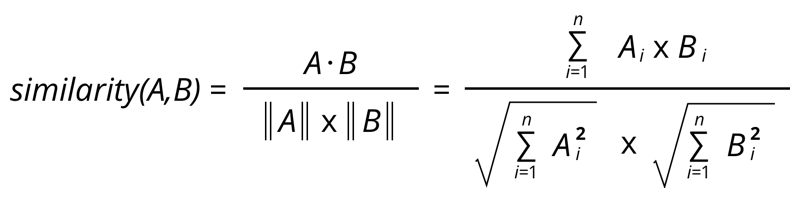|

In [72]:
Cosine_Score = {}
for d in TFIDF.keys():
    Cosine_Score[d]=TFIDF[d]/math.sqrt(magn[d])
print(Cosine_Score)

{1: 1.0}


In [70]:
print("DOCUMENT NUMBER", "| COSINE SCORE")
for docno in range(doc_count):
    print(docno+1,"\t|\t", Cosine_Score.get(docno+1,0))

cosine_sorted = sorted(Cosine_Score.items(), key=lambda item: item[1], reverse=True)
print()
print("FOR THE SEARCH QUERY")
print("\'"+" ".join(search)+"\'")
print()
print("THE MOST RELAVANT DOCUMENTS (in descending order of relevancy) ARE:")
print(*[str(docno)+" - "+corpus[docno-1] for docno,score in cosine_sorted],sep="\n")

DOCUMENT NUMBER | COSINE SCORE
1 	|	 1.0
2 	|	 0
3 	|	 0
4 	|	 0

FOR THE SEARCH QUERY
'first first first'

THE MOST RELAVANT DOCUMENTS (in descending order of relevancy) ARE:
1 - this is the FIRST!! document
